## Introduction To The Data

Prior to the ageing of prolific forwards amongst top European clubs, there are some signs of diminishing returns in their prolificity, hence the need for an ideal replacement for this aging forwards can not be overemphasized.

Manchester City, Leicester City & Chelsea contracted me to find an ideal replacemants and better alternatives for their ageing forwards in :

- Sergio Agüero, 31
- Jammy Vardy, 32
- Oliver Giroud, 33

The dataset contains a scout list with a number top forwards across the globe which was compiled by a Chief Scout in Europe. I'll be using the forwards in the scout list to find the ideal replacement of this ageing top forwards

Here are the data dictionary for the columns:

- LSGPG: Long shots goals per game;
- GPG: Goals per game;
- HGPG: Headed goals per game;
- GIBPG: Goals inside the box per game;
- ASPG: Assists per game;
- SPG: Shots per game;
- GWFPG: Goals with weak foot per goal;
- CC: Chances Created


In this mission:
- Create an initial cluster using the kMeans Model
- Train a model on the entire dataset using kMeans Model
- Find ideal replacements for the ageing forwards.
- Find better alternatives for the ageing forwards

In [1]:
import pandas as pd
forwards = pd.read_csv("Forward_Scout_List.csv")
forwards

,Player Name,Club,Age,Value (M€),LSGPG,GPG,HGPG,GIBPG,ASPG,SPG,GWFPG,Pace,DA,DD,Agressiveness,Individual Ability,Team Player,Poacher Ability,CC,Strength
0,Jammy Vardy,Leicester City,32,45.0,0.08,0.59,0.33,0.73,0.11,3,0.100,91,77,61,79,85,82,97,65,70
1,Sergio Agüero,Manchester City,31,70.0,0.22,0.67,0.17,0.60,0.14,7,0.200,84,87,20,79,90,52,87,88,85
2,Oliver Giroud,Chelsea,33,15.0,0.03,0.48,0.44,0.85,0.23,1,0.033,69,69,68,70,76,95,78,83,80
3,Erling Håland,Red Bull Salzburg,19,100.0,0.07,0.73,0.40,0.80,0.08,4,0.100,79,81,38,82,83,77,98,63,75
4,Lautaro Martínez,Inter,23,85.0,0.23,0.58,0.29,0.67,0.10,7,0.200,85,86,24,81,88,51,87,84,85
5,Danny Ings,Southampton,26,40.0,0.18,0.58,0.38,0.70,0.08,5,0.200,88,80,63,87,86,74,97,63,78
6,Timo Werner,RB Leipzig,23,80.0,0.20,0.68,0.20,0.70,0.28,5,0.170,90,83,29,72,86,60,93,85,63
7,Moussa Dembélé,Lyon,23,45.0,0.05,0.57,0.36,0.75,0.05,2,0.100,80,79,31,76,82,56,94,54,76
8,Ciro Immobile,Lazio,27,45.0,0.22,0.72,0.36,0.68,0.27,6,0.190,81,86,22,76,89,60,95,87,85
9,Aleksandar Mitrović,Fulham,25,38.0,0.04,0.65,0.45,0.84,0.21,2,0.033,70,71,62,71,80,85,86,83,84


## Rescaling the Data

Looking at our  columns, we can see a big difference between the range of each. LSGPG, GPG, etc has values between 0-1 but Agressiveness, Individual Ability, etc is on a dramatically different scale, with values ranging from 0-100. 

In order to make sure these values are equally weighted within our model, I'll need to rescale the data.

Rescaling simply stretches or shrinks the data as needed to be on the same scale, in our case between 0 and 1.

In [3]:
from sklearn.preprocessing import minmax_scale
columns = ["SPG","Pace","DA","DD","Agressiveness","Individual Ability","Team Player","Poacher Ability","CC","Strength"]
for col in columns:
    forwards[col + "_scaled"] = minmax_scale(forwards[col])
    

In [4]:
forwards

,Player Name,Club,Age,Value (M€),LSGPG,GPG,HGPG,GIBPG,ASPG,SPG,...,SPG_scaled,Pace_scaled,DA_scaled,DD_scaled,Agressiveness_scaled,Individual Ability_scaled,Team Player_scaled,Poacher Ability_scaled,CC_scaled,Strength_scaled
0,Jammy Vardy,Leicester City,32,45.0,0.08,0.59,0.33,0.73,0.11,3,...,0.333333,1.000000,0.380952,0.857143,0.500000,0.5625,0.711111,0.95,0.297297,0.291667
1,Sergio Agüero,Manchester City,31,70.0,0.22,0.67,0.17,0.60,0.14,7,...,1.000000,0.681818,0.857143,0.020408,0.500000,0.8750,0.044444,0.45,0.918919,0.916667
2,Oliver Giroud,Chelsea,33,15.0,0.03,0.48,0.44,0.85,0.23,1,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,0.00,0.783784,0.708333
3,Erling Håland,Red Bull Salzburg,19,100.0,0.07,0.73,0.40,0.80,0.08,4,...,0.500000,0.454545,0.571429,0.387755,0.666667,0.4375,0.600000,1.00,0.243243,0.500000
4,Lautaro Martínez,Inter,23,85.0,0.23,0.58,0.29,0.67,0.10,7,...,1.000000,0.727273,0.809524,0.102041,0.611111,0.7500,0.022222,0.45,0.810811,0.916667
5,Danny Ings,Southampton,26,40.0,0.18,0.58,0.38,0.70,0.08,5,...,0.666667,0.863636,0.523810,0.897959,0.944444,0.6250,0.533333,0.95,0.243243,0.625000
6,Timo Werner,RB Leipzig,23,80.0,0.20,0.68,0.20,0.70,0.28,5,...,0.666667,0.954545,0.666667,0.204082,0.111111,0.6250,0.222222,0.75,0.837838,0.000000
7,Moussa Dembélé,Lyon,23,45.0,0.05,0.57,0.36,0.75,0.05,2,...,0.166667,0.500000,0.476190,0.244898,0.333333,0.3750,0.133333,0.80,0.000000,0.541667
8,Ciro Immobile,Lazio,27,45.0,0.22,0.72,0.36,0.68,0.27,6,...,0.833333,0.545455,0.809524,0.061224,0.333333,0.8125,0.222222,0.85,0.891892,0.916667
9,Aleksandar Mitrović,Fulham,25,38.0,0.04,0.65,0.45,0.84,0.21,2,...,0.166667,0.045455,0.095238,0.877551,0.055556,0.2500,0.777778,0.40,0.783784,0.875000


In [5]:
forwards = forwards.drop(columns, axis=1)

## Creating and Exploring the Clusters

Because we are dealing with three forwards, I'll create 3 clusters to find the ideal replacement for each

In [24]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=1)
forwards_distances = kmeans_model.fit_transform(forwards.iloc[:, 4:])
print(forwards_distances)

[[0.36743771 1.48507163 1.60601829]
 [1.5503976  0.38603605 2.02223446]
 [1.80144875 2.13458745 0.45584167]
 [0.56980922 1.21845916 1.53061827]
 [1.42084157 0.42255641 1.94637787]
 [0.5486417  1.36914168 1.75184496]
 [1.20098332 0.96719636 1.95250186]
 [0.87162289 1.28440845 1.5947411 ]
 [1.35894607 0.44541569 1.84799032]
 [1.44485423 1.69944701 0.32469091]
 [1.50415036 0.42660537 1.92441774]
 [1.28451246 0.41411511 1.94559525]
 [1.39493286 0.72315064 1.47975432]
 [0.34652488 1.42893165 1.68881808]
 [0.27991274 1.36525836 1.61643696]
 [0.26589199 1.3482891  1.6499182 ]
 [1.47660525 0.55206664 1.83068583]
 [0.69656168 1.31760392 1.56330685]
 [1.62765762 1.89301399 0.27713628]
 [0.49861196 1.63928558 1.65257109]
 [1.44698793 0.63620247 1.92664703]
 [1.30705678 0.52771896 2.05026999]
 [1.44134448 0.41076407 1.81705264]
 [1.49569624 1.65261188 0.57451294]]


In [25]:
labels = kmeans_model.labels_
print(pd.crosstab(labels, forwards["Player Name"]))

Player Name  Aleksandar Mitrović  Chris Wood  Ciro Immobile  Cyriel Dessers  \
row_0                                                                         
0                              0           0              0               0   
1                              0           0              1               1   
2                              1           1              0               0   

Player Name  Danny Ings  Donyell Malen  Erling Håland  Gabriel Barbosa  \
row_0                                                                    
0                     1              0              1                0   
1                     0              1              0                1   
2                     0              0              0                0   

Player Name  Jammy Vardy  Jan Hurtado  ...  Myron Boadu  Odsonne Édouard  \
row_0                                  ...                                 
0                      1            0  ...            1                1   
1    

## Finding Ideal Replacements

In [10]:
Agüero_id_replacements = forwards[(labels == 1)] 

In [20]:
Agüero_id_replacements[["Player Name", "Age","Club", "Value (M€)"]]

,Player Name,Age,Club,Value (M€)
1,Sergio Agüero,31,Manchester City,70.0
4,Lautaro Martínez,23,Inter,85.0
6,Timo Werner,23,RB Leipzig,80.0
8,Ciro Immobile,27,Lazio,45.0
10,Cyriel Dessers,25,Heracles Almelo,25.0
11,Donyell Malen,20,PSV Eindhoven,30.0
12,Luka Jović,22,Real Madrid,60.0
16,Jan Hurtado,19,Boca Juniors,7.5
20,Zé Luís,26,Porto,10.0
21,Paco Alcácer,26,Borussia Dortmund,55.0


In [22]:
Vardy_id_replacements = forwards[(labels == 0)] 
Vardy_id_replacements[["Player Name", "Age","Club", "Value (M€)"]]

,Player Name,Age,Club,Value (M€)
0,Jammy Vardy,32,Leicester City,45.0
3,Erling Håland,19,Red Bull Salzburg,100.0
5,Danny Ings,26,Southampton,40.0
7,Moussa Dembélé,23,Lyon,45.0
13,Jonathan David,19,Gent,25.0
14,Rafael Leão,20,A.C. Milan,21.0
15,Myron Boadu,18,AZ Alkmaar,8.0
17,Victor Osimhen,20,Lile,30.0
19,Odsonne Édouard,21,Celtic,18.0


In [23]:
Giroud_id_replacements = forwards[(labels) == 2]
Giroud_id_replacements[["Player Name", "Age","Club", "Value (M€)"]]

,Player Name,Age,Club,Value (M€)
2,Oliver Giroud,33,Chelsea,15.0
9,Aleksandar Mitrović,25,Fulham,38.0
18,Wout Weghorst,27,VfL Wolfsburg,28.0
23,Chris Wood,27,Burnley,20.0


## Finding Alternative

I'd want to find forwards that ended up in another cluster but can be an alternative for another cluster.
For E.g, **Erling Håland** ended up in the Vardy's cluster or Vardy_id_replacements but can also be an alternative to be included in Agüero's Cluster

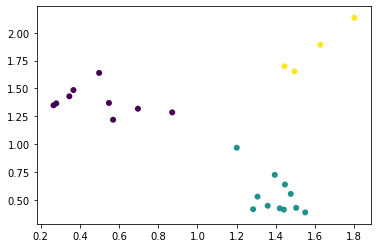

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=forwards_distances[:,0], y=forwards_distances[:,1], c=labels, linewidths=0)
plt.show()

- The dark purple color represents Vardy's Cluster
- The light blue color represents Agüero's Cluster
- The yellow color represents Giroud's Cluster

From the plot above, there are few outliners, and these could be alternatives for another cluster

In [50]:
alt_forwards = (forwards_distances **2).sum(axis=1)
forwards["alt_forwards"] = alt_forwards
print(forwards[["Player Name", "alt_forwards"]])

            Player Name  alt_forwards
0           Jammy Vardy      4.919743
1         Sergio Agüero      6.642189
2         Oliver Giroud      8.009473
3         Erling Håland      4.152118
4      Lautaro Martínez      5.985732
5            Danny Ings      5.244517
6           Timo Werner      6.190093
7        Moussa Dembélé      4.952631
8         Ciro Immobile      5.460198
9   Aleksandar Mitrović      5.081148
10       Cyriel Dessers      6.147844
11        Donyell Malen      5.606804
12           Luka Jović      4.658457
13       Jonathan David      5.014032
14          Rafael Leão      4.555150
15          Myron Boadu      4.610812
16          Jan Hurtado      5.836551
17       Victor Osimhen      4.665207
18        Wout Weghorst      6.309576
19      Odsonne Édouard      5.666862
20              Zé Luís      6.210496
21         Paco Alcácer      6.190492
22      Gabriel Barbosa      5.547881
23           Chris Wood      5.298298


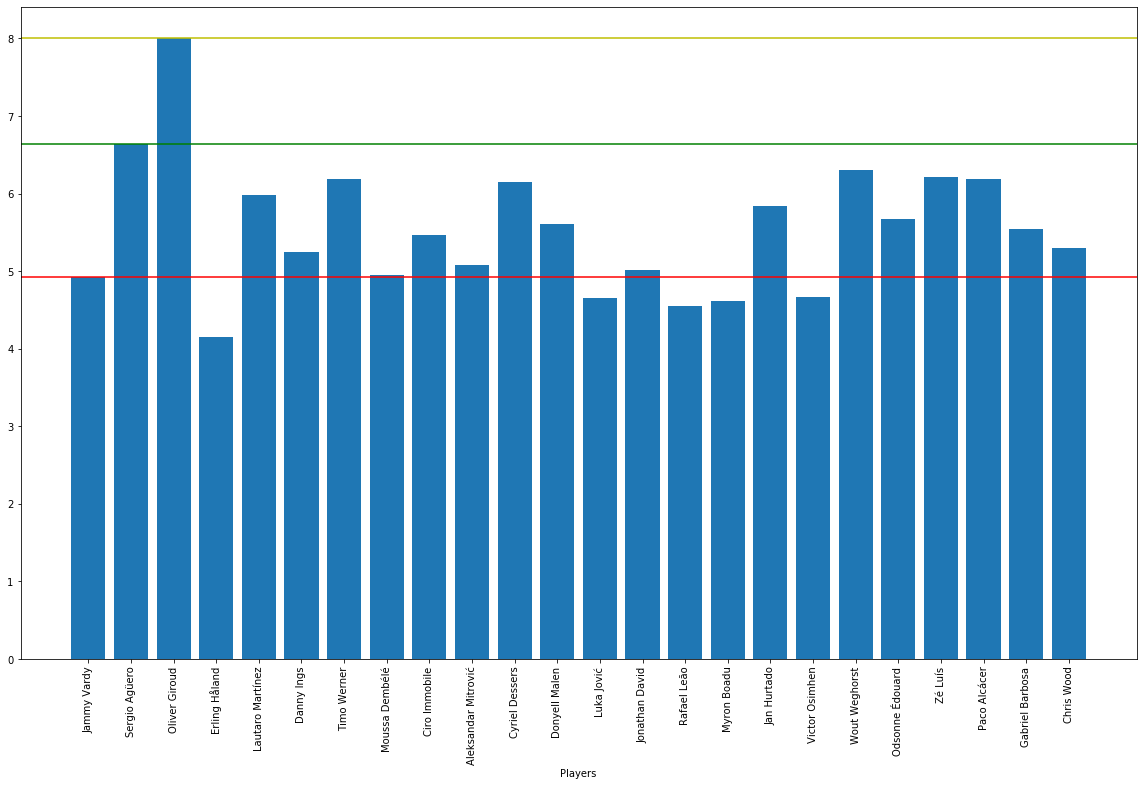

In [51]:
fig = plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
plt.xlabel("Players")
plt.axhline(y=4.919743, color="r", linestyle='-')
plt.axhline(y=6.642189, color="g", linestyle='-')
plt.axhline(y=8.009473, color="y", linestyle='-')
plt.bar(forwards["Player Name"], forwards["alt_forwards"])
plt.show()

From the plot:

An Alternative Forward for Jammy Vardy includes:
- Aleksandar Mitrović 
- Gabriel Barbosa
- Chris Wood 
- Ciro Immobile
- Luka Jovic

An Alternative for Sergio Agüero includes:
- Odsonne Édouard
- Wout Weghorst

- There's none for Oliver Giroud